In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_FOLDER = "/Users/sunandashanbhag/Desktop/Coding/Kaggle/Airbnb/airbnb-recruiting-new-user-bookings/"
WORK_FOLDER = "/Users/sunandashanbhag/Desktop/Coding/Kaggle/Airbnb/"

In [3]:
train_users = pd.read_csv(DATA_FOLDER+"train_users_2.csv")
test_users = pd.read_csv(DATA_FOLDER+"test_users.csv")
sessions = pd.read_csv(DATA_FOLDER+"sessions.csv")
countries = pd.read_csv(DATA_FOLDER+"countries.csv")
age_gender_bkts = pd.read_csv(DATA_FOLDER+"age_gender_bkts.csv")


In [4]:
feature_dfs = dict()

In [5]:
train_users.shape, sessions.shape, countries.shape, age_gender_bkts.shape

((213451, 16), (10567737, 6), (10, 7), (420, 5))

In [7]:
def dq(df):
#     display(df.info())
    dq_df = None
    for c in df.columns:
        tmp = pd.DataFrame()
        tmp.loc[0,'column'] = c
        tmp.loc[0,'count_notnull'] = df[~df[c].isnull()].shape[0]
        tmp.loc[0,'perc_notnull'] = round(tmp.loc[0,'count_notnull']/df.shape[0]*100,2)
        tmp.loc[0,'count_null'] = df[df[c].isnull()].shape[0]
        tmp.loc[0,'perc_null'] = round(tmp.loc[0,'count_null']/df.shape[0]*100,2)
        tmp.loc[0,'count_unique'] = df[c].nunique()
        if (df[c].dtype in ['int64', 'float64']):
            tmp.loc[0,"min"] = format(df[c].min(),'g')
            tmp.loc[0,"max"] = format(df[c].max(),'g')
        else:
            tmp.loc[0,"min"] = None
            tmp.loc[0,"max"] = None  
        if dq_df is None:
            dq_df = tmp
        else:
            dq_df = pd.concat([dq_df, tmp])
    return dq_df

In [51]:
dq(train_users)

,column,count_notnull,perc_notnull,count_null,perc_null,count_unique,min,max
0,id,213451.0,100.00,0.0,0.00,213451.0,NaN,NaN
0,date_account_created,213451.0,100.00,0.0,0.00,1634.0,NaN,NaN
0,timestamp_first_active,213451.0,100.00,0.0,0.00,213451.0,2.00903e+13,2.01406e+13
0,date_first_booking,88908.0,41.65,124543.0,58.35,1976.0,NaN,NaN
0,gender,213451.0,100.00,0.0,0.00,4.0,NaN,NaN
0,age,125461.0,58.78,87990.0,41.22,127.0,1,2014
0,signup_method,213451.0,100.00,0.0,0.00,3.0,NaN,NaN
0,signup_flow,213451.0,100.00,0.0,0.00,17.0,0,25
0,language,213451.0,100.00,0.0,0.00,25.0,NaN,NaN
0,affiliate_channel,213451.0,100.00,0.0,0.00,8.0,NaN,NaN


In [11]:
dq(age_gender_bkts)

,column,count_notnull,perc_notnull,count_null,perc_null,count_unique,min,max
0,age_bucket,420.0,100.0,0.0,0.0,21.0,NaN,NaN
0,country_destination,420.0,100.0,0.0,0.0,10.0,NaN,NaN
0,gender,420.0,100.0,0.0,0.0,2.0,NaN,NaN
0,population_in_thousands,420.0,100.0,0.0,0.0,381.0,0,11601
0,year,420.0,100.0,0.0,0.0,1.0,2015,2015


In [12]:
dq(sessions)

,column,count_notnull,perc_notnull,count_null,perc_null,count_unique,min,max
0,user_id,10533241.0,99.67,34496.0,0.33,135483.0,NaN,NaN
0,action,10488111.0,99.25,79626.0,0.75,359.0,NaN,NaN
0,action_type,9441533.0,89.34,1126204.0,10.66,10.0,NaN,NaN
0,action_detail,9441533.0,89.34,1126204.0,10.66,155.0,NaN,NaN
0,device_type,10567737.0,100.00,0.0,0.00,14.0,NaN,NaN
0,secs_elapsed,10431706.0,98.71,136031.0,1.29,337661.0,0,1.79998e+06


In [8]:
train_users['pop'] = 'train'
test_users['pop'] = 'test'

In [9]:
data_all = pd.concat([train_users.drop(['country_destination'], axis=1)
                      , test_users])

# Train users data

## Dates 

In [10]:
train_users.date_account_created = pd.to_datetime(train_users.date_account_created)
train_users.date_first_booking = pd.to_datetime(train_users.date_first_booking)
train_users.timestamp_first_active = pd.to_datetime(train_users.timestamp_first_active)


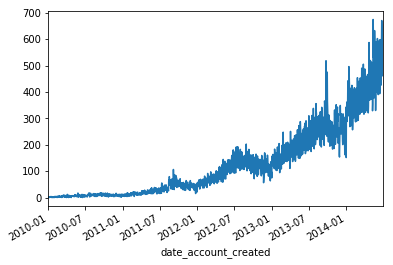

In [11]:
train_users.groupby('date_account_created').size().plot.line()

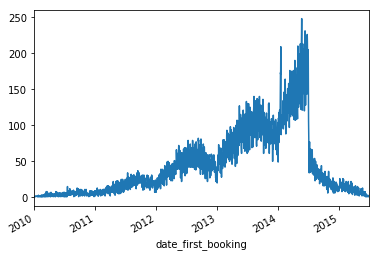

In [12]:
train_users.groupby('date_first_booking').size().plot.line()

In [15]:
train_users['diff_firstbooking_datecreated'] = (train_users.date_first_booking 
                                 - train_users.date_account_created).dt.days
train_users['diff_firstbooking_firstactive'] = (train_users.date_first_booking 
                                 - pd.DatetimeIndex(train_users['timestamp_first_active']).normalize()).dt.days

In [1]:
# 29 records show a first booking date before created date..

In [16]:
train_users[train_users.diff_firstbooking_datecreated<0].shape

(29, 19)

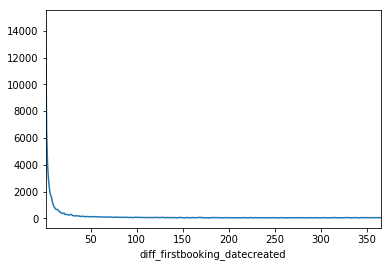

In [17]:
train_users[train_users.diff_firstbooking_datecreated>0].groupby(['diff_firstbooking_datecreated']).size().plot.line()

In [18]:
train_users[train_users.diff_firstbooking_firstactive<0].shape

(0, 19)

(0, 1000)

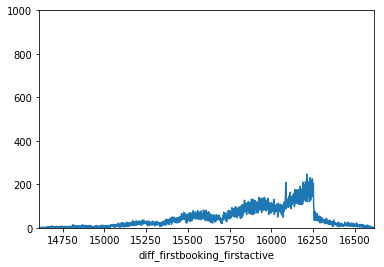

In [19]:
train_users[train_users.diff_firstbooking_firstactive>0].groupby(['diff_firstbooking_firstactive']).size().plot.line()
plt.ylim(0,1000)

In [21]:
train_users.loc[train_users.diff_firstbooking_datecreated<0, 'diff_firstbooking_datecreated'] = -1

29 users have a booking date before account created date

In [22]:
def feature_dates(df_inp):
    if df_inp.date_account_created.dtype != np.datetime64:
        df_inp.date_account_created = pd.to_datetime(df_inp.date_account_created)
    if df_inp.date_first_booking.dtype != np.datetime64 :
          df_inp.date_first_booking = pd.to_datetime(df_inp.date_first_booking)
    if df_inp.timestamp_first_active.dtype != np.datetime64 :
        df_inp.timestamp_first_active = pd.to_datetime(df_inp.timestamp_first_active,
                                                           format=('%Y%m%d%H%M%S'))
    df_tmp = df_inp[['id']].copy()
    df_tmp['diff_firstbooking_datecreated'] = (df_inp.date_first_booking 
                                 - df_inp.date_account_created).dt.days
    df_tmp['diff_firstbooking_firstactive'] = (df_inp.date_first_booking 
                                     - pd.DatetimeIndex(df_inp['timestamp_first_active']).normalize()).dt.days
#     feature_list.append('diff_firstbooking_datecreated')
#     feature_list.append('diff_firstbooking_firstactive')
    return df_tmp

In [23]:
feature_dfs.update({'date': feature_dates})

## Gender

In [24]:
train_users.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [25]:
train_users.loc[train_users.gender=='-unknown-','gender']=np.nan

In [26]:
train_users.gender.value_counts()

FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

In [27]:
def feature_gender(df_inp):
    df_inp.loc[df_inp.gender=='-unknown-','gender']=np.nan
    gender_dict = {'FEMALE': 1, 'MALE':0, 'OTHER':2, np.nan:-1}
    df_tmp = df_inp[['id']].copy()
    df_tmp['gender_feature'] = -1
    df_tmp['gender_feature'] = df_inp['gender'].apply(lambda x: gender_dict[x])
#     feature_list.append('gender_feature')
    return df_tmp

In [28]:
feature_dfs.update({'gender': feature_gender})

## Age 

In [29]:
train_users.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [30]:
train_users[train_users.age>100].shape

(2345, 19)

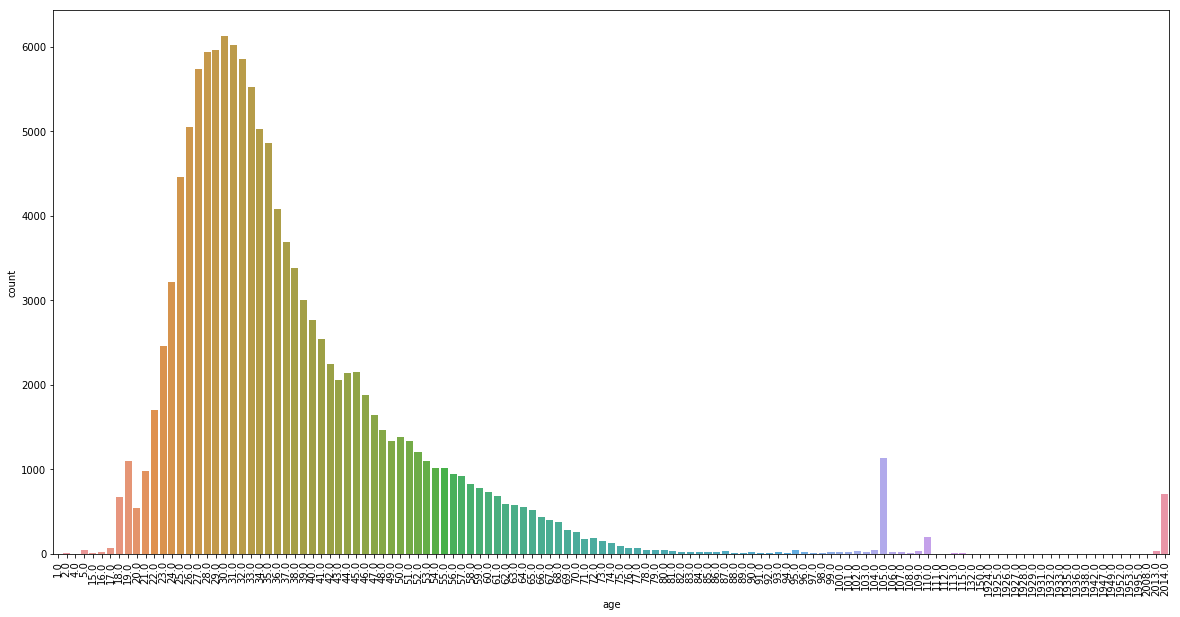

In [31]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90) 
sns.countplot(train_users.age)
plt.show()

In [32]:
train_users.loc[train_users.age>100,'age']=np.nan
train_users.loc[train_users.age<10,'age']=np.nan

In [33]:
train_users.age.describe()

count    123059.000000
mean         36.559211
std          11.690611
min          15.000000
25%          28.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

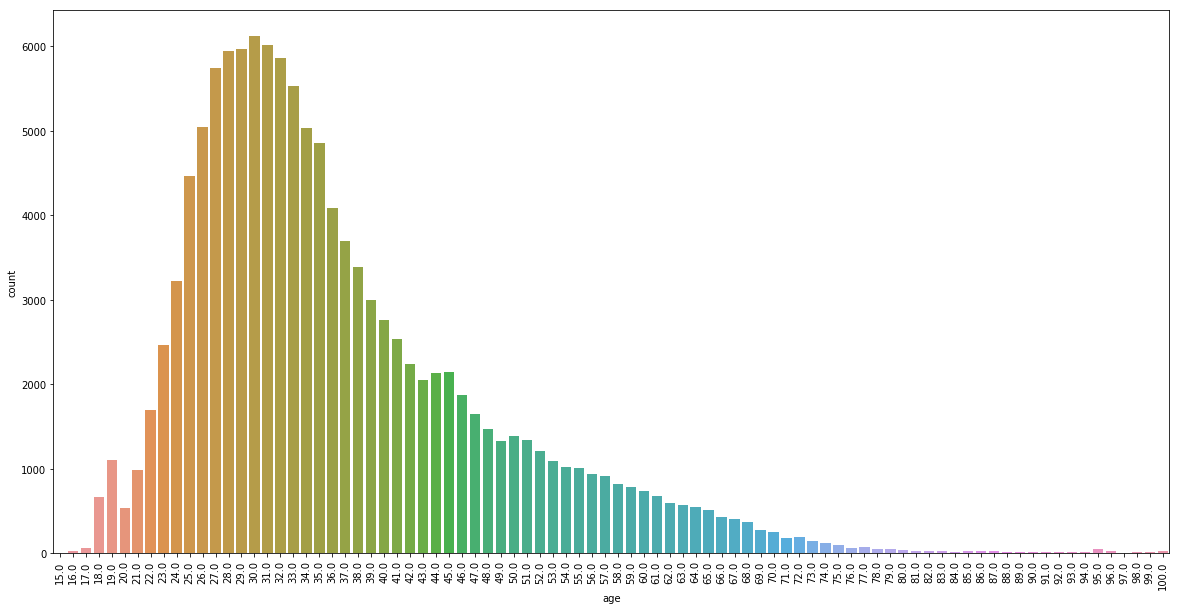

In [34]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90) 
sns.countplot(train_users.age)
plt.show()

In [35]:
def feature_age(df_inp):
    df_inp.loc[df_inp.age>100,'age']=np.nan
    df_inp.loc[df_inp.age<10,'age']=np.nan
    return df_inp[['id','age']]

In [36]:
feature_dfs.update({'age': feature_age})

## machine details 

In [37]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,pop,diff_firstbooking_datecreated,diff_firstbooking_firstactive
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,train,NaN,NaN
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,train,NaN,NaN
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,train,-1.0,14823.0
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,train,278.0,15591.0
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,train,-1.0,14658.0


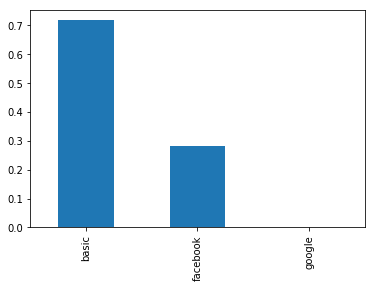

In [38]:
train_users.signup_method.value_counts(normalize=True, dropna=False).plot(kind='bar')

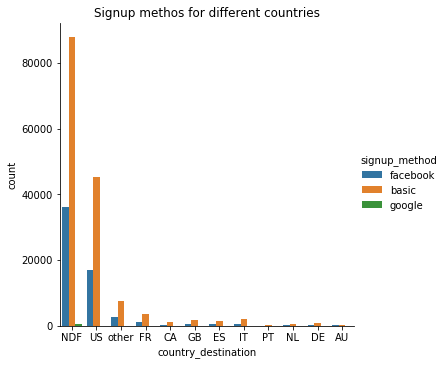

In [39]:
# (train_users.groupby(['country_destination','signup_method']).size())
sns.catplot(data=train_users,kind='count',x='country_destination',hue='signup_method')
plt.title('Signup methos for different countries')
plt.show()

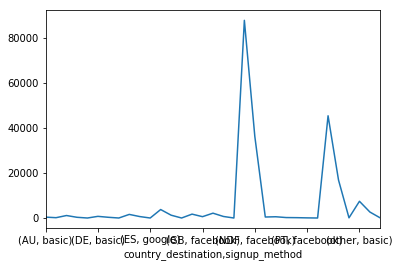

In [41]:
train_users.groupby(['country_destination','signup_method']).size().plot()

In [42]:
def feature_signup_method(df_inp):
    df_tmp = pd.concat([pd.get_dummies(df_inp.signup_method), df_inp[['id']]], axis=1)
    df_tmp.columns = ['signup_method_'+ x for x in df_tmp.columns if x!='id']+['id']
    return df_tmp

In [43]:
feature_dfs.update({'signup_method': feature_signup_method})

In [44]:
tmp = feature_signup_method(train_users)

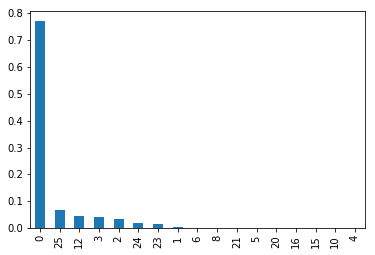

In [45]:
train_users.signup_flow.value_counts(normalize=True).plot(kind='bar')

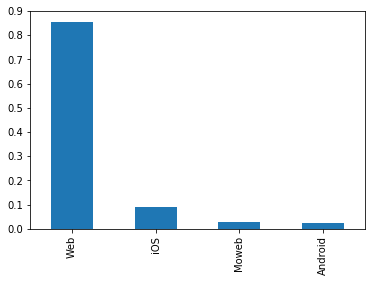

In [46]:
train_users.signup_app.value_counts(normalize=True, dropna=False).plot(kind='bar')

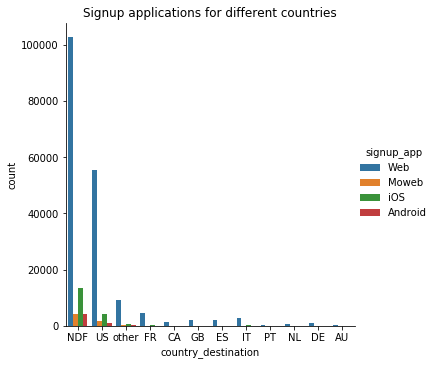

In [47]:
sns.catplot(data=train_users,kind='count',x='country_destination',hue='signup_app')
plt.title('Signup applications for different countries')
plt.show()

In [48]:
def feature_signup_app(df_inp):
    df_tmp = pd.concat([pd.get_dummies(df_inp.signup_app), df_inp[['id']]], axis=1)
    df_tmp.columns = ['signup_app_'+ x for x in df_tmp.columns if x!='id']+['id']
    return df_tmp

In [49]:
feature_dfs.update({'signup_app': feature_signup_app})

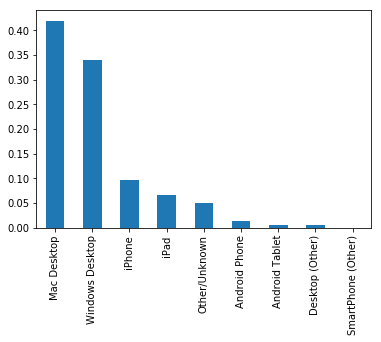

In [50]:
train_users.first_device_type.value_counts(normalize=True).plot(kind='bar')

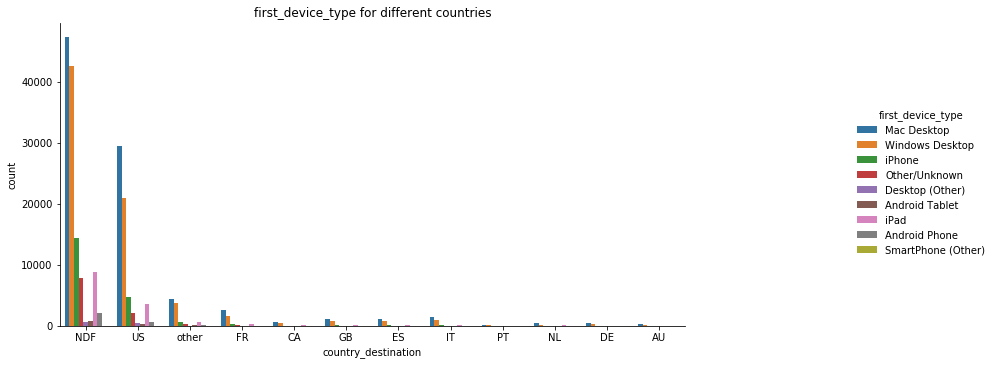

In [51]:
a4_dims = (15, 8.27)
sns.catplot(data=train_users,kind='count',x='country_destination',hue='first_device_type').fig.set_figwidth(15)
plt.title('first_device_type for different countries')
plt.show()

In [52]:
def feature_first_device_type(df_inp):
    df_tmp = pd.concat([pd.get_dummies(df_inp.first_device_type), df_inp[['id']]], axis=1)
    df_tmp.columns = ['first_device_type_'+ x for x in df_tmp.columns if x!='id']+['id']
    return df_tmp

In [53]:
feature_dfs.update({'first_device_type': feature_first_device_type})

In [54]:
browser_list = list(
    train_users.first_browser.value_counts()
            [train_users.first_browser.value_counts().values>100]
                .index)

In [49]:
(pd.crosstab(train_users.first_browser,train_users.country_destination))

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
first_browser,,,,,,,,,,,,
-unknown-,39,98,76,158,358,160,190,19648,56,17,5628,838
AOL Explorer,0,1,0,1,6,1,3,182,0,0,46,5
Android Browser,1,3,2,5,10,2,4,571,2,0,212,39
Apple Mail,0,0,1,0,0,0,1,21,0,0,12,1
Arora,0,0,0,0,0,0,0,1,0,0,0,0
Avant Browser,0,0,0,0,0,0,0,3,0,0,0,1
BlackBerry Browser,1,0,0,0,2,0,2,31,0,0,15,2
Camino,0,0,0,0,0,0,0,2,0,0,7,0
Chrome,154,486,361,755,1535,742,897,33968,260,73,21061,3553


In [55]:
def feature_first_browser(df_inp):
    df_tmp = pd.concat([pd.get_dummies(df_inp.first_browser), df_inp[['id']]], axis=1)
    df_tmp.columns = ['first_browser_'+ x for x in df_tmp.columns if x!='id']+['id']
    return df_tmp

In [56]:
feature_dfs.update({'first_browser': feature_first_browser})

In [57]:
feature_first_browser(train_users).head()

,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,id
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,gxn3p5htnn
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,820tgsjxq7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4ft3gnwmtx
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bjjt8pjhuk
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,87mebub9p4


In [58]:
train_users.loc[train_users.first_browser=='-unknown-','first_browser']=np.nan

In [59]:
train_users.language.value_counts(normalize=True)

en    0.966564
zh    0.007646
fr    0.005491
es    0.004287
ko    0.003500
de    0.003429
it    0.002408
ru    0.001822
pt    0.001124
ja    0.001054
sv    0.000572
nl    0.000454
tr    0.000300
da    0.000272
pl    0.000253
cs    0.000150
no    0.000141
th    0.000112
el    0.000112
id    0.000103
hu    0.000084
fi    0.000066
is    0.000023
ca    0.000023
hr    0.000009
Name: language, dtype: float64

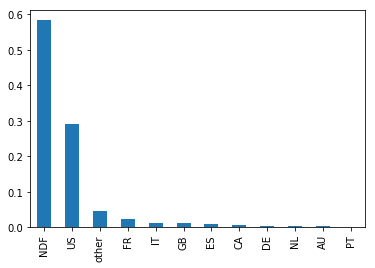

In [60]:
train_users.country_destination.value_counts(normalize=True).plot(kind='bar')

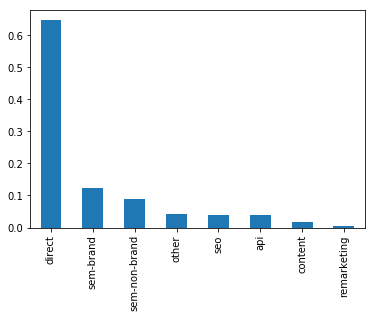

In [61]:
train_users.affiliate_channel.value_counts(normalize=True).plot(kind='bar')

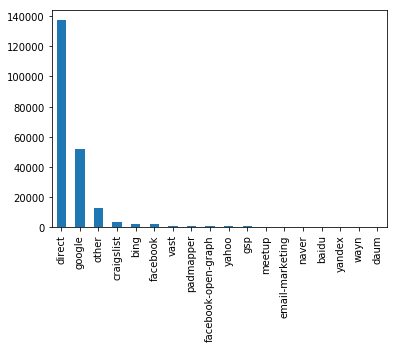

In [62]:
train_users.affiliate_provider.value_counts().plot(kind='bar')

# Country data

In [63]:
countries.columns

Index(['country_destination', 'lat_destination', 'lng_destination',
       'distance_km', 'destination_km2', 'destination_language ',
       'language_levenshtein_distance'],
      dtype='object')

In [64]:
 countries[['destination_language ' ,'language_levenshtein_distance','distance_km']].head()

,destination_language,language_levenshtein_distance,distance_km
0,eng,0.00,15297.7440
1,eng,0.00,2828.1333
2,deu,72.61,7879.5680
3,spa,92.25,7730.7240
4,fra,92.06,7682.9450


In [65]:
def feature_language(df_inp):
    df_tmp = df_inp[['id','language']].merge(
    countries[['destination_language ' ,'language_levenshtein_distance','distance_km']],
                               left_on='language',
        right_on='destination_language ',how='left').drop(['destination_language ','language'], axis=1)
#     display(df_tmp.head())
    return df_tmp
    

In [66]:
feature_dfs.update({'language': feature_language})

# Age gender data

In [67]:
age_gender_bkts.shape

(420, 5)

In [68]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [69]:
age_gender_bkts['min_age'] = age_gender_bkts.age_bucket.apply(lambda x: int(x.split('-')[0]) if x!='100+' else 100)
age_gender_bkts['max_age'] = age_gender_bkts.age_bucket.apply(lambda x: int(x.split('-')[-1]) if x!='100+' else 100)

In [70]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year,min_age,max_age
0,100+,AU,male,1.0,2015.0,100,100
1,95-99,AU,male,9.0,2015.0,95,99
2,90-94,AU,male,47.0,2015.0,90,94
3,85-89,AU,male,118.0,2015.0,85,89
4,80-84,AU,male,199.0,2015.0,80,84


In [72]:
age_gender_bkts.groupby('age_bucket')['country_destination'].value_counts()

age_bucket  country_destination
0-4         AU                     2
            CA                     2
            DE                     2
            ES                     2
            FR                     2
            GB                     2
            IT                     2
            NL                     2
            PT                     2
            US                     2
10-14       AU                     2
            CA                     2
            DE                     2
            ES                     2
            FR                     2
            GB                     2
            IT                     2
            NL                     2
            PT                     2
            US                     2
100+        AU                     2
            CA                     2
            DE                     2
            ES                     2
            FR                     2
            GB                     2
      

In [73]:
def feature_population(df_inp):
    age_gender_bkts.gender = age_gender_bkts.gender.str.upper()
    df_mg = (df_inp[['id','country_destination','age','gender']]
             .merge(age_gender_bkts, on = ['country_destination', 'gender']
                    , how='left'))
    df_mg = df_mg[(df_mg.age <= df_mg.max_age) & (df_mg.age >= df_mg.min_age)][['id','population_in_thousands']]
    df_mg.columns = ['id','population_dest']
    return df_mg
    

In [74]:
feature_dfs.update({'population': feature_population})

# Sessions

In [75]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [76]:
sessions.shape

(10567737, 6)

In [71]:
sessions.action.unique()

array(['lookup', 'search_results', 'personalize', 'index',
       'similar_listings', 'ajax_refresh_subtotal', 'show',
       'header_userpic', 'ask_question', nan,
       'other_hosting_reviews_first', 'hosting_social_proof',
       'decision_tree', 'recent_reservations', 'faq_experiment_ids',
       'multi', 'active', 'dashboard', 'create', 'confirm_email',
       'show_personalize', 'verify', 'pending', 'requested', 'concierge',
       'faq', 'clear_reservation', 'cancellation_policies',
       'track_page_view', 'update', 'my', 'campaigns', 'notifications',
       'listings', 'unavailabilities', 'ajax_lwlb_contact',
       'ajax_check_dates', 'qt2', 'request_new_confirm_email',
       'ajax_photo_widget_form_iframe', 'facebook_auto_login', 'identity',
       'qt_reply_v2', 'travel_plans_current', 'complete_status',
       'populate_from_facebook', 'kba_update', 'kba', 'login',
       'authenticate', 'calendar_tab_inner2', 'other_hosting_reviews',
       'social_connections', 'relat

In [77]:
sessions.action.value_counts(dropna=False)


show                           2768278
index                           843699
search_results                  725226
personalize                     706824
search                          536057
ajax_refresh_subtotal           487744
update                          365130
similar_listings                364624
social_connections              339000
reviews                         320591
active                          188036
similar_listings_v2             168788
lookup                          162041
create                          155887
dashboard                       152952
header_userpic                  141830
collections                     124417
edit                            109083
campaigns                       105028
track_page_view                  81117
NaN                              79626
unavailabilities                 78317
qt2                              64651
notifications                    59392
confirm_email                    58726
requested                

In [73]:
sessions.action_detail.value_counts(dropna=False)

view_search_results         1776885
p3                          1376550
NaN                         1126204
-unknown-                   1031141
wishlist_content_update      706824
                             ...   
special_offer_field               3
tos_2014                          2
host_refund_guest                 2
host_respond_page                 2
host_standard_suspension          1
Name: action_detail, Length: 156, dtype: int64

In [78]:
sessions.loc[sessions.action_detail=='-unknown-','action_detail']=np.nan
sessions.loc[sessions.action_type=='-unknown-','action_type']=np.nan
sessions.loc[sessions.action=='-unknown-','action']=np.nan


In [79]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [81]:
sessions.secs_elapsed.describe().apply(lambda x: format(x, 'f'))

count    10431706.000000
mean        19405.810751
std         88884.243208
min             0.000000
25%           229.000000
50%          1147.000000
75%          8444.000000
max       1799977.000000
Name: secs_elapsed, dtype: object

In [77]:
median_per_action = pd.DataFrame(sessions.groupby('action')['secs_elapsed'].median()).sort_values('secs_elapsed')

In [78]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [82]:
sessions["secs_elapsed"].fillna(sessions.groupby("action")["secs_elapsed"].transform("median"), inplace=True)

In [83]:
sessions.secs_elapsed.describe().apply(lambda x: format(x, 'f'))

count    10552284.000000
mean        19323.098796
std         88382.198934
min             0.000000
25%           236.000000
50%          1174.000000
75%          8999.000000
max       1799977.000000
Name: secs_elapsed, dtype: object

In [84]:
def sess_features(x):
    d = {}
    d['action_distinct_count'] = x['action'].nunique()
    d['device_distinct_count'] = x['device_type'].nunique()
    d['sessions_count'] = len(x)
    d['min_secs'] = x['secs_elapsed'].min()
    d['total_secs'] = x['secs_elapsed'].sum()
    d['avg_secs'] = x['secs_elapsed'].mean()
    return pd.Series(d, index=['action_distinct_count', 'device_distinct_count'
                               , 'sessions_count', 'min_secs', 'total_secs', 'avg_secs'
                              ])


In [85]:
sessions_features = sessions.groupby('user_id').apply(sess_features)

In [86]:
sessions_features.head()

,action_distinct_count,device_distinct_count,sessions_count,min_secs,total_secs,avg_secs
user_id,,,,,,
00023iyk9l,13.0,2.0,40.0,0.0,881566.0,22039.150000
0010k6l0om,11.0,1.0,63.0,3.0,600213.0,9527.190476
001wyh0pz8,10.0,1.0,90.0,35.0,293405.0,3260.055556
0028jgx1x1,5.0,2.0,31.0,3.0,307450.0,9917.741935
002qnbzfs5,25.0,2.0,789.0,0.0,6487353.0,8222.247148


In [87]:
sessions_features.reset_index().user_id.nunique()

135483

In [88]:
def feature_sessions(df_inp):
    return df_inp[['id']].merge(sessions_features.reset_index(), left_on='id', right_on='user_id', how='left').drop(['user_id'], axis=1)

In [89]:
feature_dfs.update({'sessions': feature_sessions})

# Get all features

In [90]:
def features_final(df_inp):
    df_features = df_inp[['id','pop']].copy()
    for key, func in feature_dfs.items():
        if key=='population' and 'country_destination' not in df_inp.columns:
            continue
        df_tmp = func(df_inp)
#         print(key)
#         print(df_tmp.shape)
        df_features = df_features.merge(df_tmp, on='id', how='left')
    df_features = df_features.fillna(-1)
    return df_features
        

In [91]:
train_features = features_final(train_users).merge(train_users[['id','country_destination']], on = 'id')

In [89]:
train_features.shape

(213451, 84)

In [332]:
train_features.to_csv('train_features.csv', header=True)

In [92]:
all_features = features_final(data_all)

In [93]:
all_features.shape

(275547, 86)

In [94]:
all_features.to_csv('all_features.csv', header=True)

In [92]:
all_features

,id,pop,diff_firstbooking_datecreated,diff_firstbooking_firstactive,gender_feature,age,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,...,first_browser_Yandex.Browser,first_browser_wOSBrowser,language_levenshtein_distance,distance_km,action_distinct_count,device_distinct_count,sessions_count,min_secs,total_secs,avg_secs
0,gxn3p5htnn,train,-1.0,-1.0,-1,-1.0,0,1,0,0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,820tgsjxq7,train,-1.0,-1.0,0,38.0,0,1,0,0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2,4ft3gnwmtx,train,-57.0,419.0,1,56.0,1,0,0,0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
3,bjjt8pjhuk,train,278.0,1043.0,1,42.0,0,1,0,0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
4,87mebub9p4,train,-208.0,72.0,-1,41.0,1,0,0,0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,cv0na2lf5a,test,-1.0,-1.0,-1,31.0,1,0,0,0,...,0,0,-1.0,-1.0,29.0,2.0,93.0,1.0,2544672.0,27362.064516
275543,zp8xfonng8,test,-1.0,-1.0,-1,-1.0,1,0,0,0,...,0,0,-1.0,-1.0,7.0,1.0,20.0,8.0,62058.0,3102.900000
275544,fa6260ziny,test,-1.0,-1.0,-1,-1.0,1,0,0,0,...,0,0,-1.0,-1.0,17.0,1.0,78.0,6.0,836967.0,10730.346154
275545,87k0fy4ugm,test,-1.0,-1.0,-1,-1.0,1,0,0,0,...,0,0,-1.0,-1.0,11.0,2.0,15.0,17.0,362508.0,24167.200000


In [95]:
data_all.shape

(275547, 16)

In [96]:
features = sorted(all_features.columns[2:])

In [97]:
features

['action_distinct_count',
 'age',
 'avg_secs',
 'device_distinct_count',
 'diff_firstbooking_datecreated',
 'diff_firstbooking_firstactive',
 'distance_km',
 'first_browser_-unknown-',
 'first_browser_AOL Explorer',
 'first_browser_Android Browser',
 'first_browser_Apple Mail',
 'first_browser_Arora',
 'first_browser_Avant Browser',
 'first_browser_BlackBerry Browser',
 'first_browser_Camino',
 'first_browser_Chrome',
 'first_browser_Chrome Mobile',
 'first_browser_Chromium',
 'first_browser_CometBird',
 'first_browser_Comodo Dragon',
 'first_browser_Conkeror',
 'first_browser_CoolNovo',
 'first_browser_Crazy Browser',
 'first_browser_Epic',
 'first_browser_Firefox',
 'first_browser_Flock',
 'first_browser_Google Earth',
 'first_browser_Googlebot',
 'first_browser_IBrowse',
 'first_browser_IE',
 'first_browser_IE Mobile',
 'first_browser_IceDragon',
 'first_browser_IceWeasel',
 'first_browser_Iron',
 'first_browser_Kindle Browser',
 'first_browser_Maxthon',
 'first_browser_Mobile Firef

In [98]:
X_train = all_features.loc[all_features['pop']=='train', features].values
X_test = all_features.loc[all_features['pop']=='test', features].values
y_train = train_users['country_destination'].values

In [99]:
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder

labler = LabelEncoder()
y_train = labler.fit_transform(y_train)


In [100]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [102]:
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb = xgboost.XGBClassifier(n_estimators=300)
kfold = StratifiedKFold(n_splits=10, random_state=7)
# results = cross_val_score(model, X_train, y_train, cv=kfold)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [103]:
X_train.shape, y_train.shape

((213451, 84), (213451,))

In [112]:
y_train

array([ 7,  7, 10, ...,  7,  7,  7])

In [114]:
params = {
    'max_depth': 7,
    'objective': 'multi:softmax',  
    'num_class': 20,
    'n_gpus': 1,
    'minchildweight':1, 
    'gamma':0, 
    'subsample':0.9, 
    'colsamplebytree':0.9
}
clf = xgboost.XGBClassifier(**params)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsamplebytree=0.9,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, minchildweight=1, missing=None,
              n_estimators=100, n_gpus=1, n_jobs=1, nthread=None, num_class=20,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, verbosity=1)

In [121]:
y_pred = clf.predict(X_test) 

In [122]:
y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [125]:
y_pred_orig = labler.inverse_transform(y_pred)


In [126]:
y_pred_orig

array(['NDF', 'NDF', 'NDF', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

In [ ]:
param_test = {
 'max_depth':list(range(3,10,2)),
 'min_child_weight':list(range(1,6,2)),
 'max_depth':[2,4,5,6],
 'min_child_weight':[1,3,5,6],
 'learning_rate' : [0.1,0.2,0.3],
 'subsample': [0.8],
 'colsample_bytree':[0.8], 
 'objective':['multi:softprob']
}
gridsearch = GridSearchCV(xgb,
                                   param_grid=param_test                                  
                                   , scoring='accuracy'
                                   , n_jobs=1
                                   , cv=kfold.split(X_train, y_train)
                                   , verbose=True                                
                                  )
gridsearch.fit(X_train, y_train)


In [ ]:
print(gridsearch.cv_results_)
print('\n Best est:')
print(gridsearch.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('Airbnb_xgb_gs_res.csv', index=False)

In [325]:
y_train

array([ 7,  7, 10, ...,  7,  7,  7])

In [327]:
xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=22,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0)               
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_test) 

In [ ]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(X_test)):
    idx = test_ids[i]
    ids += [idx] * 5
    cts += labler.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()
